In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix, get_complexity,\
                 group_metrics
from surrogate_tree import train_surrogate_tree, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, extract_rules, print_rules,\
                 get_pruned_trees, eval_trees
from tasks.boston_housing import make_task3 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


In [3]:
mclass_diff = comparer.predict_mclass_diff(X)

# Explanations

In [4]:
%%time
trees = []
full_tree = train_surrogate_tree(X, mclass_diff)
trees = get_pruned_trees(full_tree, X, mclass_diff)
tree_it = iter(trees)
len(trees)

CPU times: user 54.7 ms, sys: 3.69 ms, total: 58.4 ms
Wall time: 81.2 ms


19

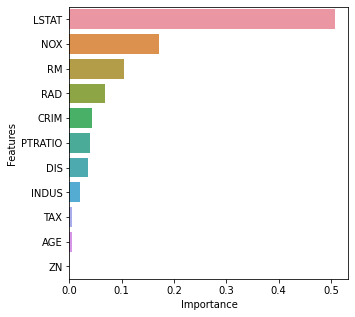

In [5]:
feature_importances, feature_order = get_feature_importances(trees[-1])
plot_feature_importances(feature_names, feature_importances, feature_order, figsize=(5, 5))

## 2 Leafs

In [5]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.11340768535890489, 1, 2)

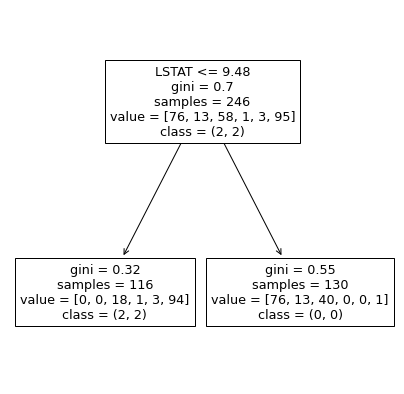

In [7]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [8]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 3 Leafs

In [9]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.065656002590499, 2, 3)

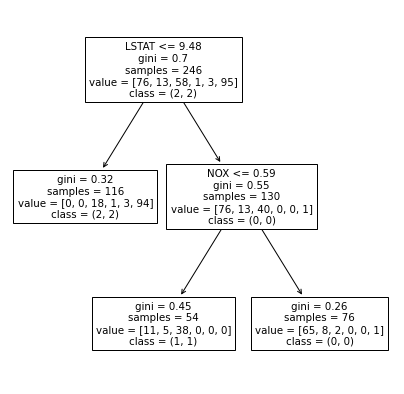

In [11]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(7, 7))

In [12]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 4 Leafs

In [13]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.04733514001806685, 2, 4)

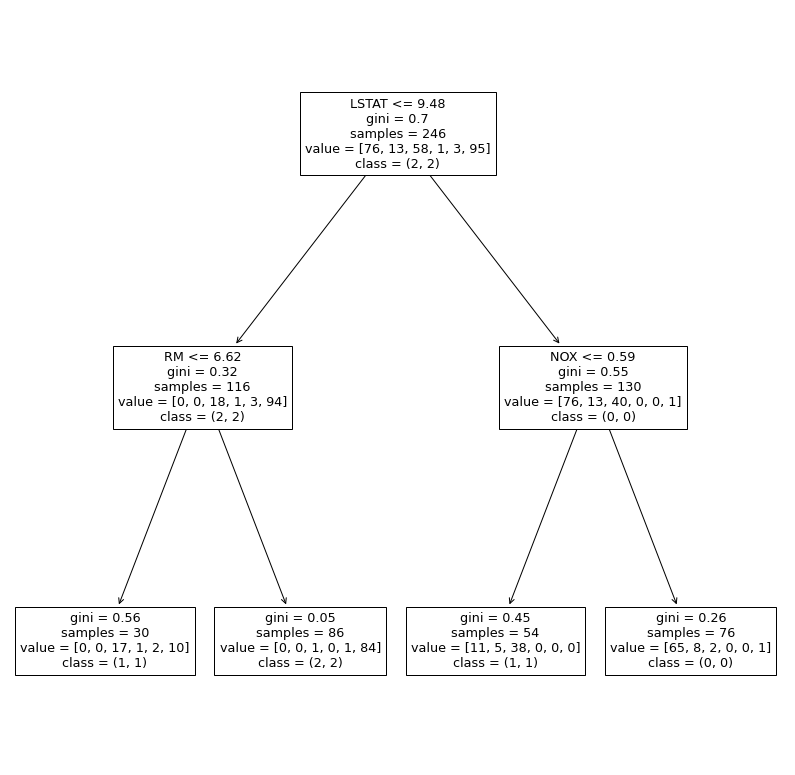

In [15]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [16]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 5 Leafs

In [17]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.04301962716596863, 3, 5)

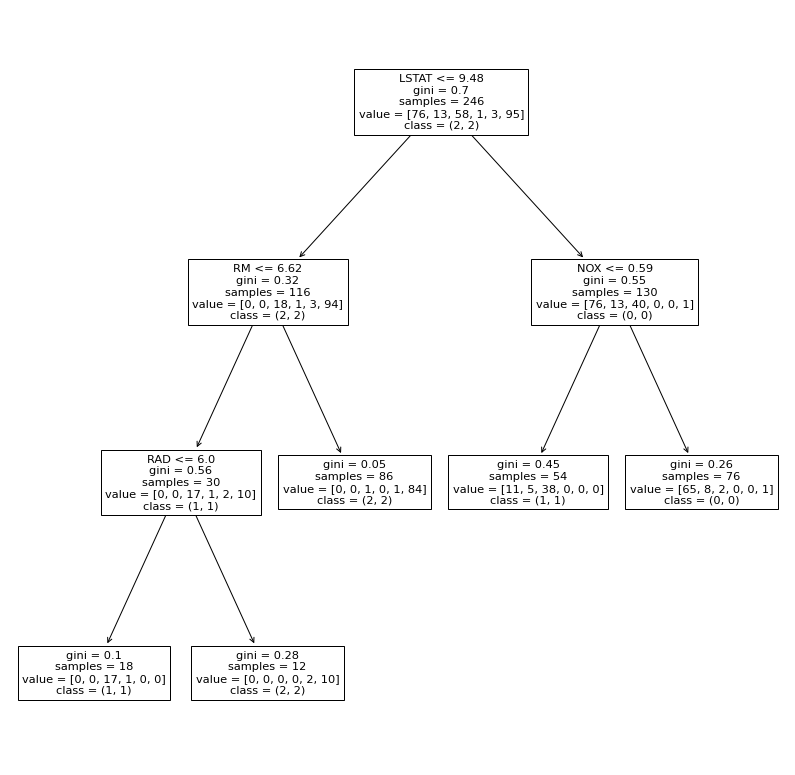

In [19]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [20]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 6 Leafs

In [21]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.022655444864307796, 3, 6)

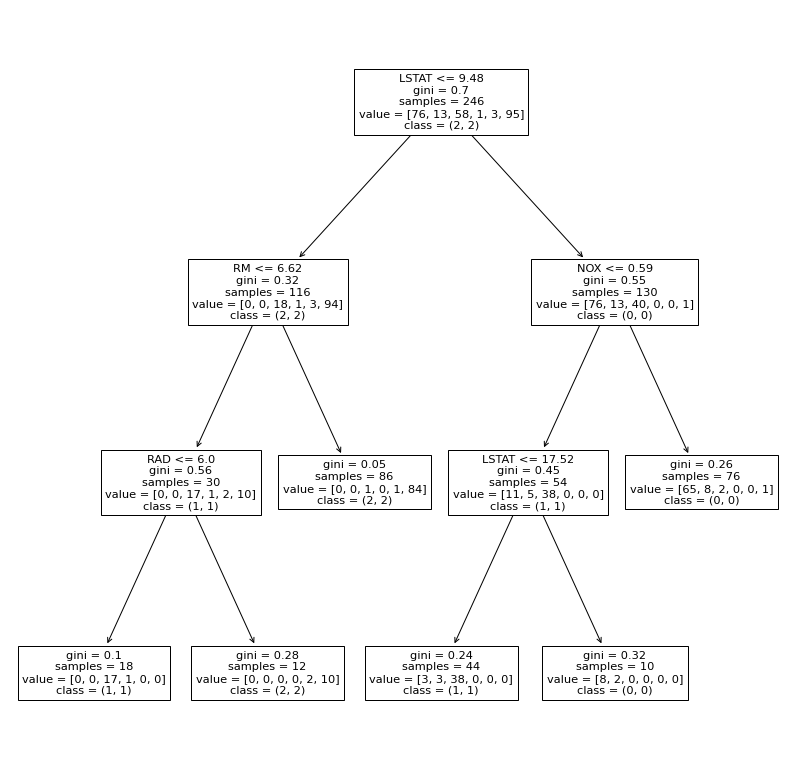

In [23]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [24]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

## 7 Leafs

In [25]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.015369610330647408, 3, 7)

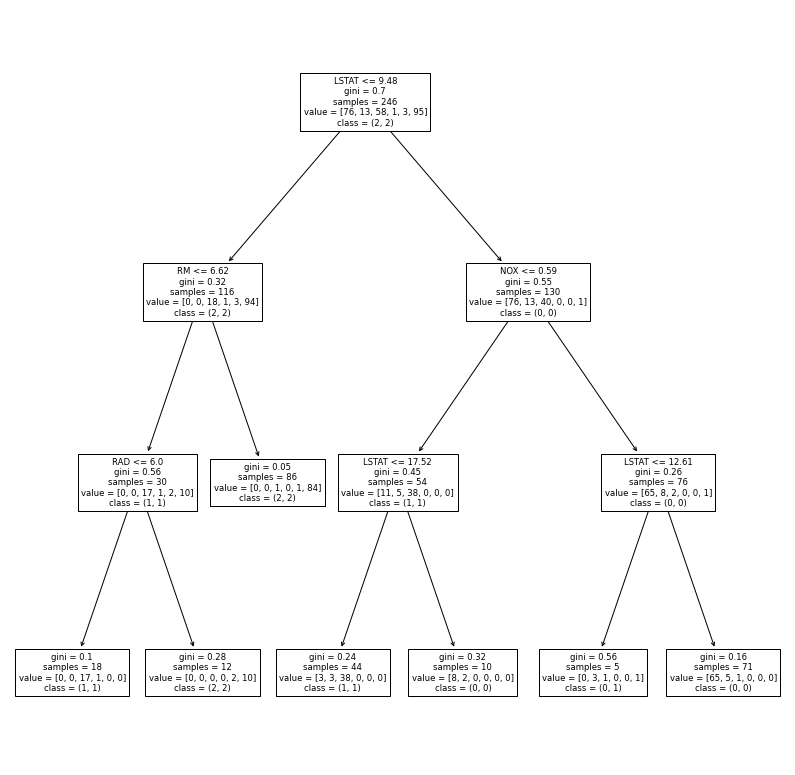

In [27]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [28]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]


## 9 Leafs

In [29]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.013787702812093062, 5, 9)

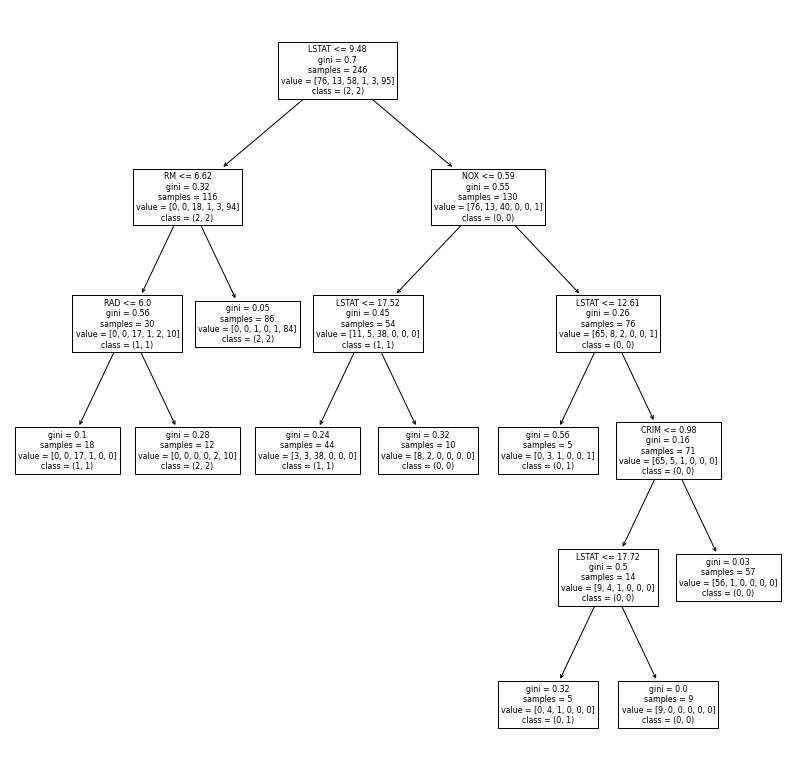

In [31]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [32]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]


## 10 Leafs

In [33]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.008949045534411396, 5, 10)

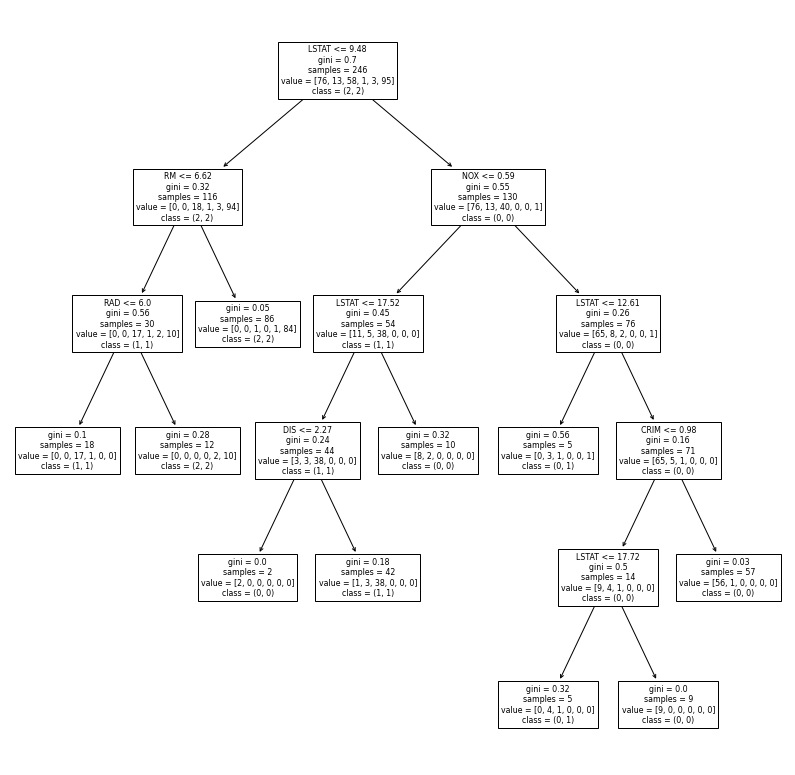

In [35]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [36]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]


## 11 Leafs

In [37]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.008130081300813009, 5, 11)

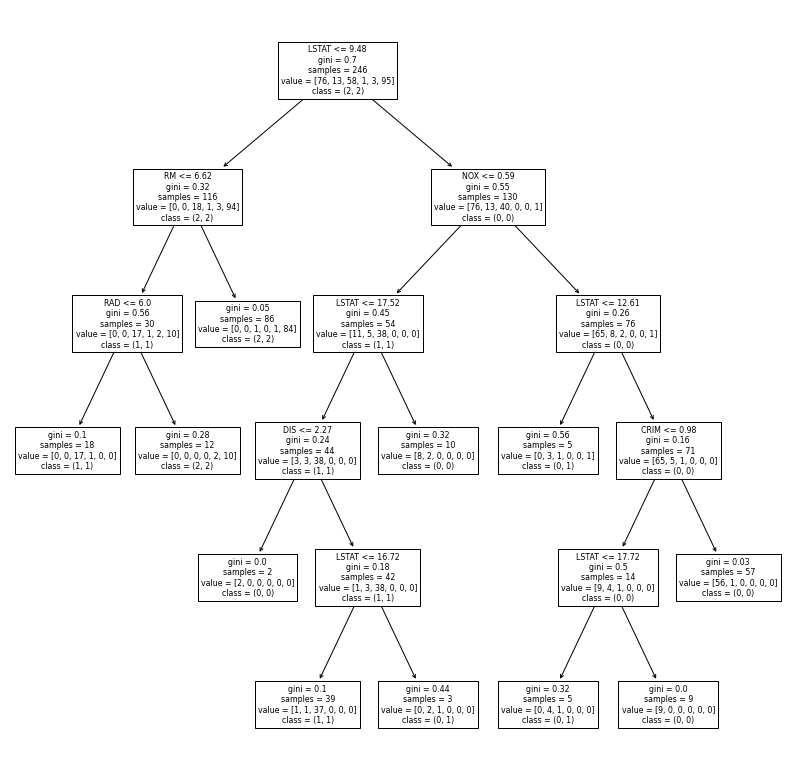

In [39]:
plot_surrogate_tree(tree, feature_names, comparer.class_names, precision=2, figsize=(14, 14))

In [40]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]
3. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]


## 12 Leafs

In [41]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007988277557194185, 5, 12)

In [43]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]
3. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
4. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]


## 14 Leafs

In [44]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007588075880758804, 5, 14)

In [46]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]
3. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
4. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]
5. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 15 Leafs

In [47]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007504690431519691, 5, 15)

In [49]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]
3. NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [1, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
5. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]
6. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 16 Leafs

In [50]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.007317073170731708, 6, 16)

In [52]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 1, 0, 0, 1]
3. NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [1, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
5. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]
6. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 17 Leafs

In [53]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.006504065040650405, 6, 17)

In [55]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 1, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [1, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
5. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]
6. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 18 Leafs

In [56]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.005420054200542005, 6, 18)

In [58]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and RM <= 6.0940001010894775 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [1, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 1, 0, 0, 0]
5. CRIM <= 5.023024320602417 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 1]
6. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 21 Leafs

In [59]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0040650406504065045, 6, 21)

In [61]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and RM <= 6.0940001010894775 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. CRIM <= 1.4226450324058533 and NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and 2.271081805229187 < DIS <= 5.516895055770874 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
5. CRIM <= 5.023024320602417 and NOX <= 0.7439999878406525 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 0]
6. RM > 6.61963152885437 and PTRATIO > 20.600000381469727 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 1, 0]


## 24 Leafs

In [62]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.003993724147767794, 8, 24)

In [64]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and RM <= 6.0940001010894775 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. CRIM <= 1.4226450324058533 and NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and 2.271081805229187 < DIS <= 5.516895055770874 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
5. CRIM <= 5.023024320602417 and NOX <= 0.7439999878406525 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 0]
6. NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.199999809265137 < PTRATIO <= 16.5 and 9.477545261383057 < LSTAT <= 16.715493202209473 => (0, 1) [0, 1, 0, 0, 0, 0]
7. RM > 6.61963152885437 and PTRATIO > 

## 26 Leafs

In [65]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0038392050587172546, 8, 26)

In [67]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and RM <= 6.0940001010894775 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. CRIM <= 1.4226450324058533 and NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and 2.271081805229187 < DIS <= 5.516895055770874 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
5. CRIM <= 5.023024320602417 and NOX <= 0.7439999878406525 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 0]
6. CRIM > 0.9839633405208588 and NOX > 0.5909999907016754 and DIS > 2.1233500242233276 and 12.607422828674316 < LSTAT <= 14.309999942779541 => (0, 1) [0, 1, 0, 0, 0, 0]
7. NOX <= 0.5909999907016754 and DIS > 2.27108180

## 28 Leafs

In [68]:
tree = next(tree_it)
tree.ccp_alpha, tree.get_depth(), tree.get_n_leaves()

(0.0, 8, 28)

In [70]:
constraints, rules, class_occurences, labels = extract_rules(tree, feature_names, comparer.difference_classes)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and RM <= 6.0940001010894775 and 12.607422828674316 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. INDUS > 18.84000015258789 and NOX > 0.5909999907016754 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. CRIM <= 1.4226450324058533 and NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
4. NOX <= 0.5909999907016754 and 2.271081805229187 < DIS <= 5.516895055770874 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
5. CRIM <= 5.023024320602417 and NOX <= 0.7439999878406525 and RM <= 6.61963152885437 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 0]
6. CRIM > 0.9839633405208588 and NOX > 0.5909999907016754 and DIS > 2.1233500242233276 and 12.607422828674316 < LSTAT <= 14.309999942779541 => (0, 1) [0, 1, 0, 0, 0, 0]
7. NOX <= 0.5909999907016754 and DIS > 2.27108180

# Evaluation

In [71]:
# TODO